In [ ]:
'''
앞으로 배울 것

1. 확률, 통계, 수열
  - 베이즈 이론 기반 → 베이지안 필터기(분류기) / 딥러닝이 나온 이후 시들해졌지만 그래도 여전히 사용됨.
    - 베이즈 이론을 이용하기 위해 → 조건부 확률

2. 벡터와 행렬 → 다차원 공간
  - 신경망, 역행렬, 행렬식

3. 함수와 미분(최적값(Optimal,*)  /  미분 → 순간 변화율)
  - 미분 가능 함수, 편미분(여러 개의 변수를 미분)
  - cost(loss) function → 미분 → 최적 cost를 도출하는 가중치(weight), 편향(bias)을 구할 수 있음.

4. 예측과 최적화
  - 회귀분석 → 연속형 예측
  
5. 신경망과 딥러닝
  - 단일 / 멀티 퍼셉트론 → 깊은 신경망
  - 순전파(forward propagation) 방식으로 입력 신호가 전달
  - 역전파(backward propagation) 방식으로 가중치 업데이트가 이루어짐
  
6. 강화학습
  - 최적 해
  - 몬테카를로 기법
  - 마르코프 전개(결정과정) 
'''

In [ ]:
'''
데이터 베이스
  - 데이터 베이스 생성, 데이터 저장/삭제, ... 

데이터 웨어하우스(data warehouse)
  - 빅데이터를 저장해놓고, 빅데이터 기반으로 분석, 정보 가공(분석하기에 용이하게 특화됨)
  - 하둡(hadoop, 빅데이터 분산 처리 프레임워크)과 연결

데이터 마트
  - 데이터 웨어하우스의 일부분. 사용자에게 데이터 웨어하우스에서 데이터를 꺼내 제공하는 역할
'''

In [ ]:
'''
json: 웹에서 사용되는 포맷. 가볍고 속도가 빠름. 딕셔너리 구조로 작성된 문서.
'''

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [11]:
obj = '''{"name": "Wes",
"places_lived":["United States", "Germany","Spain"],
"pet": null,
"siblings": [{"name":"Kim","age":25,"pets":["ba","ka"]},
{"name":"Lee","age":22, "pets":["aa","bb","cc"]}]
}
'''
print(obj) # 문자열


{"name": "Wes",
"places_lived":["United States", "Germany","Spain"],
"pet": null,
"siblings": [{"name":"Kim","age":25,"pets":["ba","ka"]},
{"name":"Lee","age":22, "pets":["aa","bb","cc"]}]
}



In [13]:
res = json.loads(obj) # json 문자열 → 파이썬 형태로 변환
res

{'name': 'Wes',
 'places_lived': ['United States', 'Germany', 'Spain'],
 'pet': None,
 'siblings': [{'name': 'Kim', 'age': 25, 'pets': ['ba', 'ka']},
  {'name': 'Lee', 'age': 22, 'pets': ['aa', 'bb', 'cc']}]}

In [15]:
asjson = json.dumps(res) # 파이썬 형태로 읽어진 객체를 JSON 형식으로 변환함.
asjson

'{"name": "Wes", "places_lived": ["United States", "Germany", "Spain"], "pet": null, "siblings": [{"name": "Kim", "age": 25, "pets": ["ba", "ka"]}, {"name": "Lee", "age": 22, "pets": ["aa", "bb", "cc"]}]}'

In [22]:
df = pd.DataFrame(res['siblings'],columns=['name','age'])
df

,name,age
0,Kim,25
1,Lee,22


In [23]:
df.to_json("myjson.json") # json 문서 형식으로 저장

In [24]:
pd.read_json("myjson.json") # json 불러오기

,name,age
0,Kim,25
1,Lee,22


In [26]:
# 데이터 정제 (누락데이터 처리)
stringData = pd.Series(['aaa','bbb',np.nan,'ccc'])
stringData

0    aaa
1    bbb
2    NaN
3    ccc
dtype: object

In [27]:
stringData.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [28]:
stringData[stringData.isnull()]

2    NaN
dtype: object

In [30]:
stringData[0] = None # None = NA
stringData

0    None
1     bbb
2     NaN
3     ccc
dtype: object

In [31]:
# NA 처리 매서드
# dropna(): 누락 데이터 축(행 or 열) 제외
# fillna(): 누락데이터를 다른 값으로 대체 or ffill, bfill
# isnull(): 누락 데이터 추출
# notnull(): isnull에 반대되는 데이터 추출

In [34]:
from numpy import nan
data = pd.Series([1,nan,3.5, nan, 7])

In [35]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [37]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [38]:
data=pd.DataFrame([[1,6,3],
                  [1,nan,nan],
                  [nan,5,2]])
data

,0,1,2
0,1.0,6.0,3.0
1,1.0,NaN,NaN
2,NaN,5.0,2.0


In [40]:
data.dropna(axis = 0)

,0,1,2
0,1.0,6.0,3.0


In [41]:
data.dropna(how='all') # 모두 nan인 경우 제외

,0,1,2
0,1.0,6.0,3.0
1,1.0,NaN,NaN
2,NaN,5.0,2.0


In [49]:
# 중복제거
data = pd.DataFrame({'a':['one','two']*3+['two'],
                    'b':[1,1,2,3,3,4,4]})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       7 non-null      object
 1   b       7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes


In [50]:
# 중복확인
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [51]:
data.drop_duplicates() # duplicated() 결과가 False인 데이터 프레임을 리턴함.

,a,b
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [53]:
data['v1']=range(7)
data

,a,b,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [54]:
# 특정 컬럼에 대한 중복값 제외
data.drop_duplicates(['a']) # a column만 중복값 제외

,a,b,v1
0,one,1,0
1,two,1,1


In [63]:
# 데이터 치환(map, replace)
ages = [-3,15,20,25,28,30,20,22,37,61,44,46,33,111]
bins = [10,20,30,40,60,100]

In [64]:
# 연령 데이터 → 연령대로 나눔 → 연령대별로 카테고리화
res = pd.cut(ages,bins) # 범주형인데 크기 차이까지 볼 수 있지.
res

[NaN, (10.0, 20.0], (10.0, 20.0], (20.0, 30.0], (20.0, 30.0], ..., (60.0, 100.0], (40.0, 60.0], (40.0, 60.0], (30.0, 40.0], NaN]
Length: 14
Categories (5, interval[int64]): [(10, 20] < (20, 30] < (30, 40] < (40, 60] < (60, 100]]

In [66]:
res.codes

array([-1,  0,  0,  1,  1,  1,  0,  1,  2,  4,  3,  3,  2, -1], dtype=int8)

In [67]:
res.categories

IntervalIndex([(10, 20], (20, 30], (30, 40], (40, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [68]:
res.value_counts()

(10, 20]     3
(20, 30]     4
(30, 40]     2
(40, 60]     2
(60, 100]    1
dtype: int64

In [69]:
pd.cut(ages,[18,26,36,61,100]) # bins를 리스트로 직접 줘도 돼 (초과 ~미만]

[NaN, NaN, (18.0, 26.0], (18.0, 26.0], (26.0, 36.0], ..., (36.0, 61.0], (36.0, 61.0], (36.0, 61.0], (26.0, 36.0], NaN]
Length: 14
Categories (4, interval[int64]): [(18, 26] < (26, 36] < (36, 61] < (61, 100]]

In [71]:
pd.cut(ages,[18,26,36,61,100], right = False) # [이상 ~ 미만)

[NaN, NaN, [18.0, 26.0), [18.0, 26.0), [26.0, 36.0), ..., [61.0, 100.0), [36.0, 61.0), [36.0, 61.0), [26.0, 36.0), NaN]
Length: 14
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [73]:
gn = ['youth','youngyouth','middleaged','senior']
pd.cut(ages,[18,26,36,61,100],labels = gn) # labeling 가능.

[NaN, NaN, youth, youth, youngyouth, ..., middleaged, middleaged, middleaged, youngyouth, NaN]
Length: 14
Categories (4, object): [youth < youngyouth < middleaged < senior]

In [74]:
res = pd.qcut(ages,4)
res

[(-3.001, 20.5], (-3.001, 20.5], (-3.001, 20.5], (20.5, 29.0], (20.5, 29.0], ..., (42.25, 111.0], (42.25, 111.0], (42.25, 111.0], (29.0, 42.25], (42.25, 111.0]]
Length: 14
Categories (4, interval[float64]): [(-3.001, 20.5] < (20.5, 29.0] < (29.0, 42.25] < (42.25, 111.0]]

In [76]:
res.value_counts() # 데이터 갯수가 균등하게 들어가도록 구간을 나눔.

(-3.001, 20.5]    4
(20.5, 29.0]      3
(29.0, 42.25]     3
(42.25, 111.0]    4
dtype: int64

In [ ]:
# 그룹별 집계 → groupby()
# 전체 데이터 → 그룹별로 분할 → 각 그룹별 집계(요약)함수 적용 → 각 그룹별 집계 결과 → 합침

In [172]:
abalone = pd.read_csv("abalone.txt",header = None, names = ['sex','length','diameter','height','whole_weight',
                                                 'shucked_weight','viscera_weight','shell_weight',
                                                 'rings'])
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [82]:
np.sum(abalone.isnull()) # 결측치 없군.

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [89]:
# 전복 성별 그룹(3가지) 전체 무게 변수에 대해 집계
grouped = abalone['whole_weight'].groupby(abalone['sex'])# sex에 따른 abalone 데이터 그룹화

In [93]:
# abalone의 ['sex'] 그룹화 → 각 그룹별 whole_weight 컬럼 값의 size() 호출 결과
grouped.size()

# abalone의 ['sex'] 그룹화 → 각 그룹별 whole_weight 컬럼 값의 sum() 호출 결과
grouped.sum()

# abalone의 ['sex'] 그룹화 → 각 그룹별 whole_weight 컬럼 값의 mean() 호출 결과
grouped.mean()

sex
F    1.046532
I    0.431363
M    0.991459
Name: whole_weight, dtype: float64

In [97]:
abalone.groupby('sex').mean()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


In [100]:
# abalone.length
# # 범주형(2가지) 변수 추가
# length  length_med
# 0.455     length_short
# 0.350     length_long
# np.where(조건, 참, 거짓)
abalone['length_med'] = np.where(abalone['length'] > abalone['length'].median(),'length_long','length_short')
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_med
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,length_short
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,length_short
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,length_short
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,length_short
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,length_short
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,length_long
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,length_long
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,length_long
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,length_long


In [105]:
mean_weight = abalone['whole_weight'].groupby([abalone['sex'],abalone['length_med']]).mean()
mean_weight.unstack()

length_med,length_long,length_short
sex,,
F,1.261330,0.589702
I,0.923215,0.351234
M,1.255182,0.538157


In [107]:
# 그룹 단위로 특정 작업을 반복
# abalone → sex 그룹화 → for loop → 그룹별 데이터셋 출력
abalone[['sex','length_med','whole_weight','rings']].groupby('sex')

# 그룹화 객체를 for loop으로 반복하면, 그룹이름(M,F,I), 그룹별 데이터 리턴 가능.

In [109]:
# 그룹화 객체를 for loop으로 반복하면, 그룹이름(M,F,I), 그룹별 데이터 리턴 가능.
for sex, group_data in abalone[['sex','length_med','whole_weight','rings']].groupby('sex'):
    print(sex),print(group_data[:5])


F
   sex    length_med  whole_weight  rings
2    F  length_short        0.6770      9
6    F  length_short        0.7775     20
7    F  length_short        0.7680     16
9    F   length_long        0.8945     19
10   F  length_short        0.6065     14
I
   sex    length_med  whole_weight  rings
4    I  length_short        0.2050      7
5    I  length_short        0.3515      8
16   I  length_short        0.2905      7
21   I  length_short        0.2255     10
42   I  length_short        0.0700      5
M
   sex    length_med  whole_weight  rings
0    M  length_short        0.5140     15
1    M  length_short        0.2255      7
3    M  length_short        0.5160     10
8    M  length_short        0.5095      9
11   M  length_short        0.4060     10


In [113]:
# 그룹 (sex,length_med)별 데이터셋 출력
for (sex, group_data) in abalone[['sex','length_med','whole_weight','rings']].groupby(['sex','length_med']):
    print(sex),print(group_data[:5])

('F', 'length_long')
   sex   length_med  whole_weight  rings
9    F  length_long        0.8945     19
22   F  length_long        0.9395     12
23   F  length_long        0.7635      9
24   F  length_long        1.1615     10
25   F  length_long        0.9285     11
('F', 'length_short')
   sex    length_med  whole_weight  rings
2    F  length_short        0.6770      9
6    F  length_short        0.7775     20
7    F  length_short        0.7680     16
10   F  length_short        0.6065     14
13   F  length_short        0.6845     10
('I', 'length_long')
    sex   length_med  whole_weight  rings
509   I  length_long        0.8735     16
510   I  length_long        1.1095     10
549   I  length_long        0.8750     11
550   I  length_long        1.1625     17
551   I  length_long        0.9885     13
('I', 'length_short')
   sex    length_med  whole_weight  rings
4    I  length_short        0.2050      7
5    I  length_short        0.3515      8
16   I  length_short        0.2905    

In [120]:
# {'F':F_data, 'M':M_data, 'I':I_data}

# 성별 그룹화 → 설병 그룹을 key로 설정 → 데이터셋은 value로 설정
list(abalone[:10][['sex','length_med','whole_weight','rings']].groupby('sex'))

# 성별 그룹화 → 설병 그룹을 key로 설정 → 데이터셋은 value로 설정
aba_group = dict(list(abalone[:10][['sex','length_med','whole_weight','rings']].groupby('sex')))
aba_group

{'F':   sex    length_med  whole_weight  rings
 2   F  length_short        0.6770      9
 6   F  length_short        0.7775     20
 7   F  length_short        0.7680     16
 9   F   length_long        0.8945     19,
 'I':   sex    length_med  whole_weight  rings
 4   I  length_short        0.2050      7
 5   I  length_short        0.3515      8,
 'M':   sex    length_med  whole_weight  rings
 0   M  length_short        0.5140     15
 1   M  length_short        0.2255      7
 3   M  length_short        0.5160     10
 8   M  length_short        0.5095      9}

In [122]:
# 그룹 이름을 키로 가지고 데이터셋 인덱싱 가능.
aba_group['M']

,sex,length_med,whole_weight,rings
0,M,length_short,0.5140,15
1,M,length_short,0.2255,7
3,M,length_short,0.5160,10
8,M,length_short,0.5095,9


In [123]:
abalone[:10][abalone['sex'] == 'M']

C:\Users\joww0\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,length_med
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,length_short
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,length_short
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,length_short
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9,length_short


In [161]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
 9   length_med      4177 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 326.5+ KB


In [216]:
abalone = pd.read_csv("abalone.txt",header = None, names = ['sex','length','diameter','height','whole_weight',
                                                 'shucked_weight','viscera_weight','shell_weight',
                                                 'rings'])
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [217]:
abalone.loc[abalone['sex']== 'M', 'sex_1'] = True
abalone.loc[abalone['sex']== 'I', 'sex_2'] = True
abalone.loc[abalone['sex']== 'F', 'sex_3'] = True
abalone['sex_1'].fillna(False, inplace=True)
abalone['sex_2'].fillna(False, inplace=True)
abalone['sex_3'].fillna(False, inplace=True)

In [218]:
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_1,sex_2,sex_3
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,True,False,False
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,True,False,False
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,False,False,True
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,True,False,False
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,False,False,True
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,True,False,False
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,True,False,False
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,False,False,True


In [248]:
x = abalone.drop('rings',axis = 1)

In [249]:
x = x.drop('sex',axis = 1)

In [221]:
y = abalone['rings']

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.3, random_state = 20201005)

In [224]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 3602 to 4089
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   length          2923 non-null   float64
 1   diameter        2923 non-null   float64
 2   height          2923 non-null   float64
 3   whole_weight    2923 non-null   float64
 4   shucked_weight  2923 non-null   float64
 5   viscera_weight  2923 non-null   float64
 6   shell_weight    2923 non-null   float64
 7   sex_1           2923 non-null   bool   
 8   sex_2           2923 non-null   bool   
 9   sex_3           2923 non-null   bool   
dtypes: bool(3), float64(7)
memory usage: 191.3 KB


In [225]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=51,
                              max_depth=7,
                              min_samples_split=8,
                     n_jobs=5,
                     random_state=42)
model.fit(xTrain, yTrain)

RandomForestRegressor(max_depth=7, min_samples_split=8, n_estimators=51,
                      n_jobs=5, random_state=42)

In [226]:
model = RandomForestRegressor()
model.fit(xTrain, yTrain)

RandomForestRegressor()

In [227]:
pred = model.predict(xTest)
pred.shape
model.score(xTrain,yTrain)

0.9333618751543394

In [228]:
from sklearn.metrics import make_scorer
def RMSLE(pv, av): # 외부로부터 예측값과 실제값을 전달받아 점수로 환산해줄거야!
    # 먼저 넘파이 배열로 변환
    pv = np.array(pv)
    av = np.array(av)
    
    # 예측값과 실제값에 1을 더하고 로그를 씌우기
    log_predict = np.log(pv+1)
    log_actual = np.log(av+1)
    
    res = log_predict - log_actual
    
    #제곱
    res = np.square(res)
    
    # 평균
    mean_res = res.mean()
    
    # 루트
    score = np.sqrt(mean_res)
    
    return score

rmsle_scorer = make_scorer(RMSLE)

In [229]:
# k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=42) # shuffle: 초기에 데이터 섞을래?
score = cross_val_score(model, xTrain, yTrain, cv = kfold, scoring = rmsle_scorer)
score.mean()

0.1798349134579665

In [234]:
import seaborn as sns

In [237]:
x_sns = x.drop('sex_1', axis = 1)
x_sns = x_sns.drop('sex_2', axis = 1)
x_sns = x_sns.drop('sex_3', axis = 1)

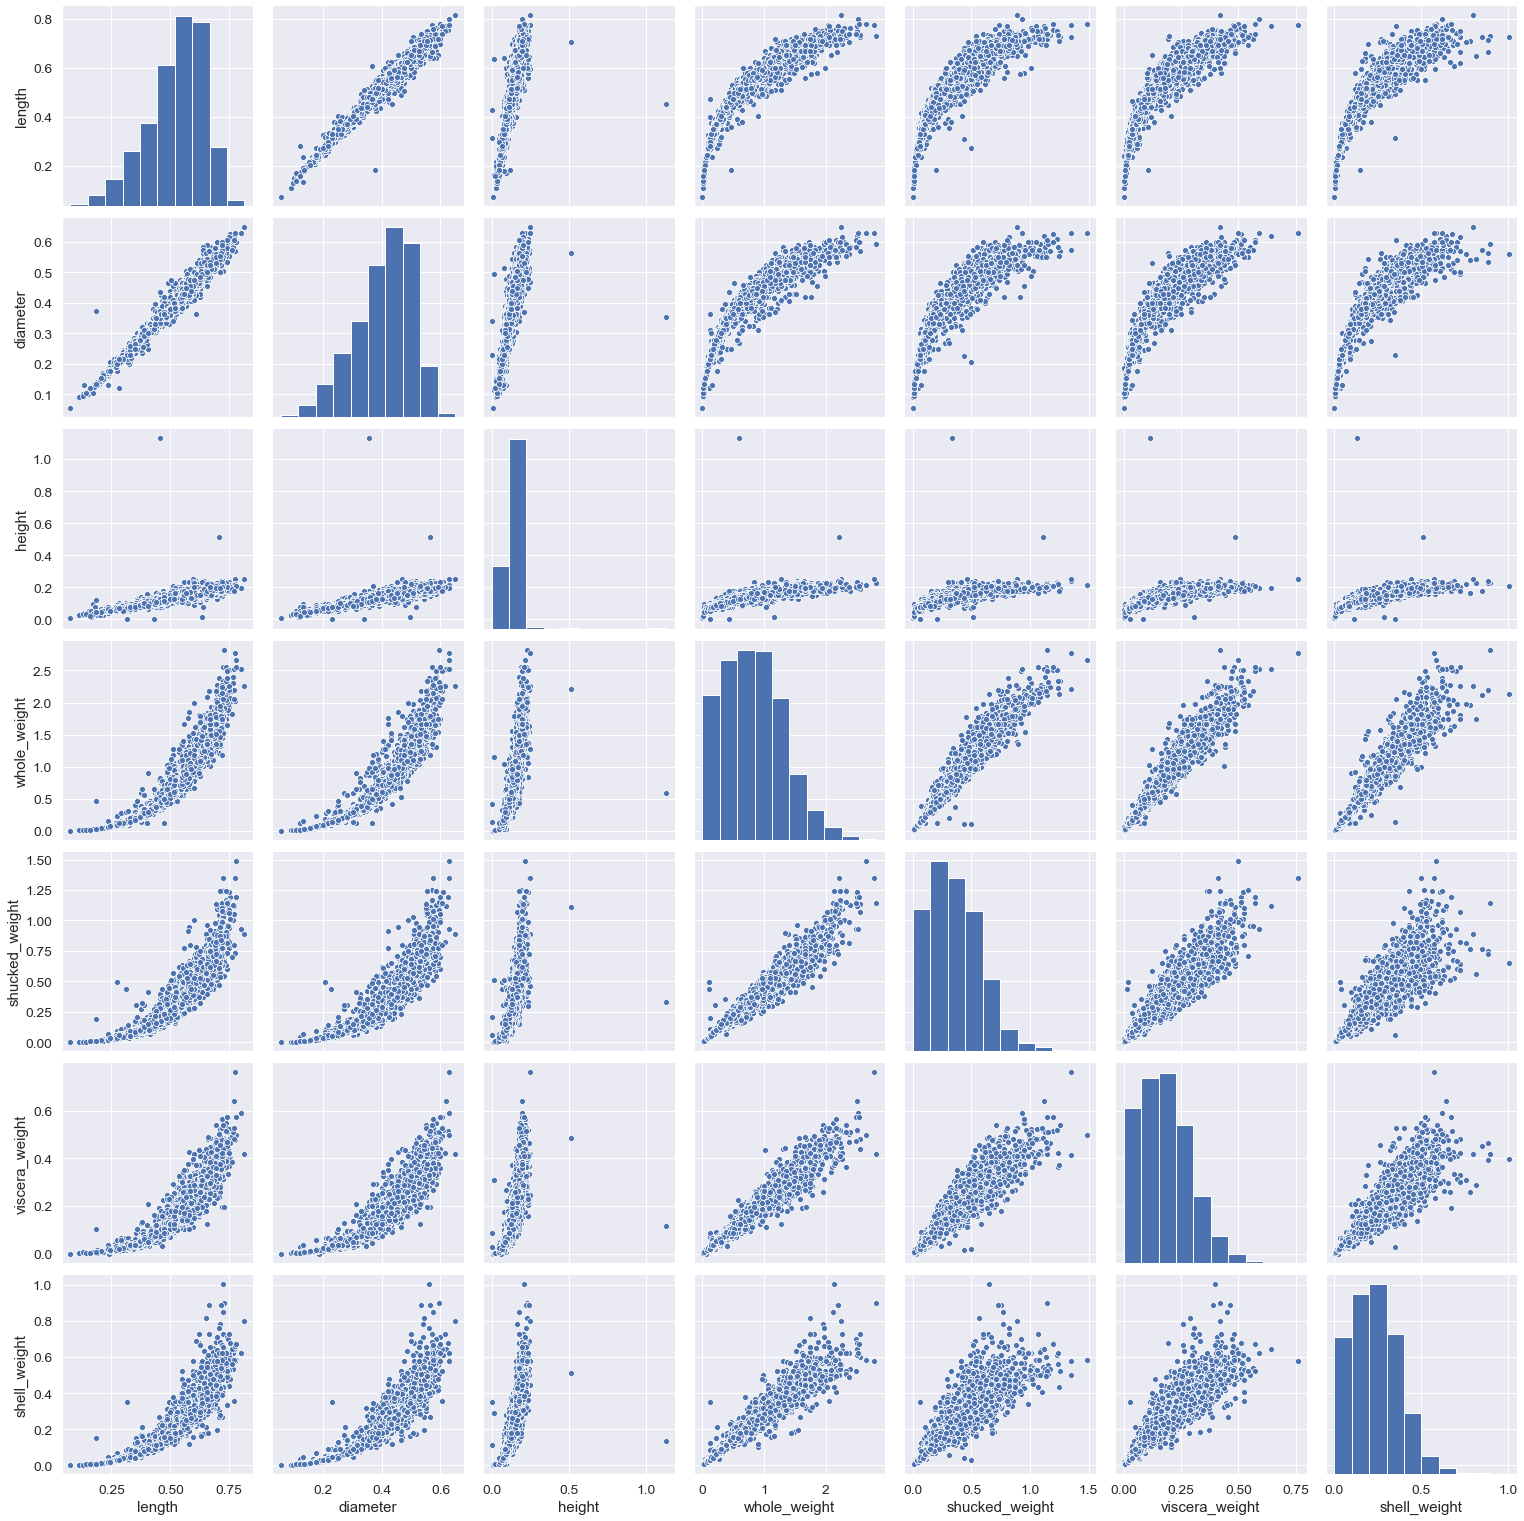

In [240]:
sns.set(font_scale=1.25)
sns.pairplot(x_sns, size = 3)

In [252]:
abalone.sort_values(by='height',ascending=False)[:2]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_1,sex_2,sex_3
2051,F,0.455,0.355,1.130,0.594,0.3320,0.1160,0.1335,8,False,False,True
1417,M,0.705,0.565,0.515,2.210,1.1075,0.4865,0.5120,10,True,False,False


In [253]:
abalone = abalone.drop(abalone[abalone['height']==1.130].index)
abalone = abalone.drop(abalone[abalone['height']==0.515].index)

In [262]:
abalone.sort_values(by='height',)[:2]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_1,sex_2,sex_3
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,False,True,False
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,False,True,False


In [263]:
abalone = abalone.drop(abalone[abalone['height']==0].index)
abalone = abalone.drop(abalone[abalone['height']==0].index)

In [280]:
abalone[(abalone['diameter'] > 0.44) & (abalone['height'] < 0.05)]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_1,sex_2,sex_3
1174,F,0.635,0.495,0.015,1.1565,0.5115,0.308,0.2885,9,False,False,True


In [282]:
abalone = abalone.drop(abalone[abalone['shucked_weight'] == 0.5115].index)

In [298]:
abalone[(abalone['diameter'] > 0.2) & (abalone['length'] < 0.2)]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_1,sex_2,sex_3
1210,I,0.185,0.375,0.12,0.4645,0.196,0.1045,0.15,6,False,True,False


In [299]:
abalone = abalone.drop(abalone[abalone['whole_weight'] == 0.4645].index)

In [312]:
from scipy.stats import norm

In [320]:
from scipy.stats import probplot

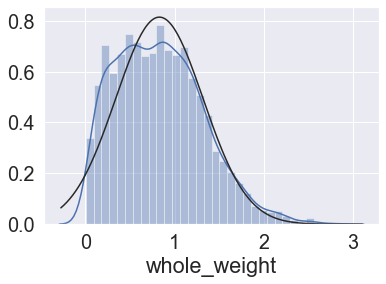

<Figure size 432x288 with 0 Axes>

In [317]:
# 정규분포를 따르는지?
from scipy.stats import norm

sns.distplot(abalone['whole_weight'],fit=norm)
fig=plt.figure()

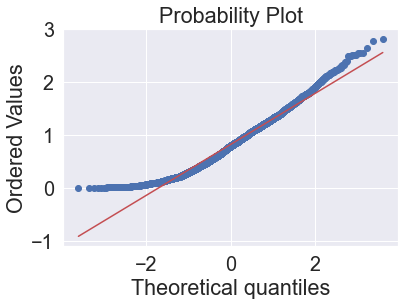

In [322]:
res = probplot(abalone['whole_weight'],plot = plt)

In [323]:
abalone['whole_weight'] = np.log(abalone['whole_weight'])

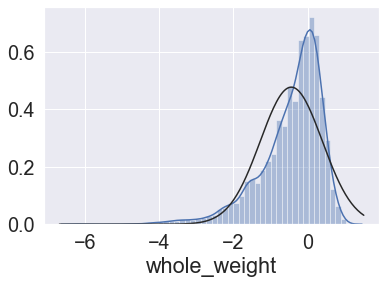

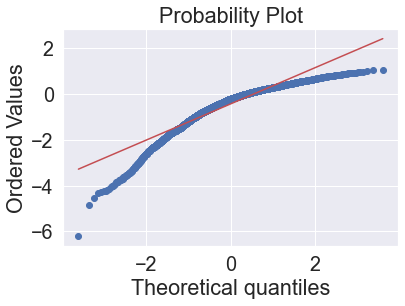

In [324]:
sns.distplot(abalone['whole_weight'],fit=norm)
fig=plt.figure()
res = probplot(abalone['whole_weight'],plot = plt)

In [300]:
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_1,sex_2,sex_3
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,True,False,False
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,True,False,False
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,False,False,True
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,True,False,False
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,False,False,True
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,True,False,False
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,True,False,False
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,False,False,True


In [301]:
x = abalone.drop('rings',axis = 1)
x = x.drop('sex',axis = 1)

In [302]:
y = abalone['rings']

In [303]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.3, random_state = 20201005)

In [343]:
model = RandomForestRegressor(max_depth = 9,min_samples_split=4, n_estimators=151)
model.fit(xTrain, yTrain)

RandomForestRegressor(max_depth=9, min_samples_split=4, n_estimators=151)

In [344]:
pred = model.predict(xTest)
pred.shape
model.score(xTrain,yTrain)
# default: 0.93
# optimized value: 0.79

0.7885617898398153

In [345]:
score.mean() # defalut나 optimized value나 똑같

0.1798349134579665

In [340]:
x_sns = x.drop('sex_1', axis = 1)
x_sns = x_sns.drop('sex_2', axis = 1)
x_sns = x_sns.drop('sex_3', axis = 1)

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


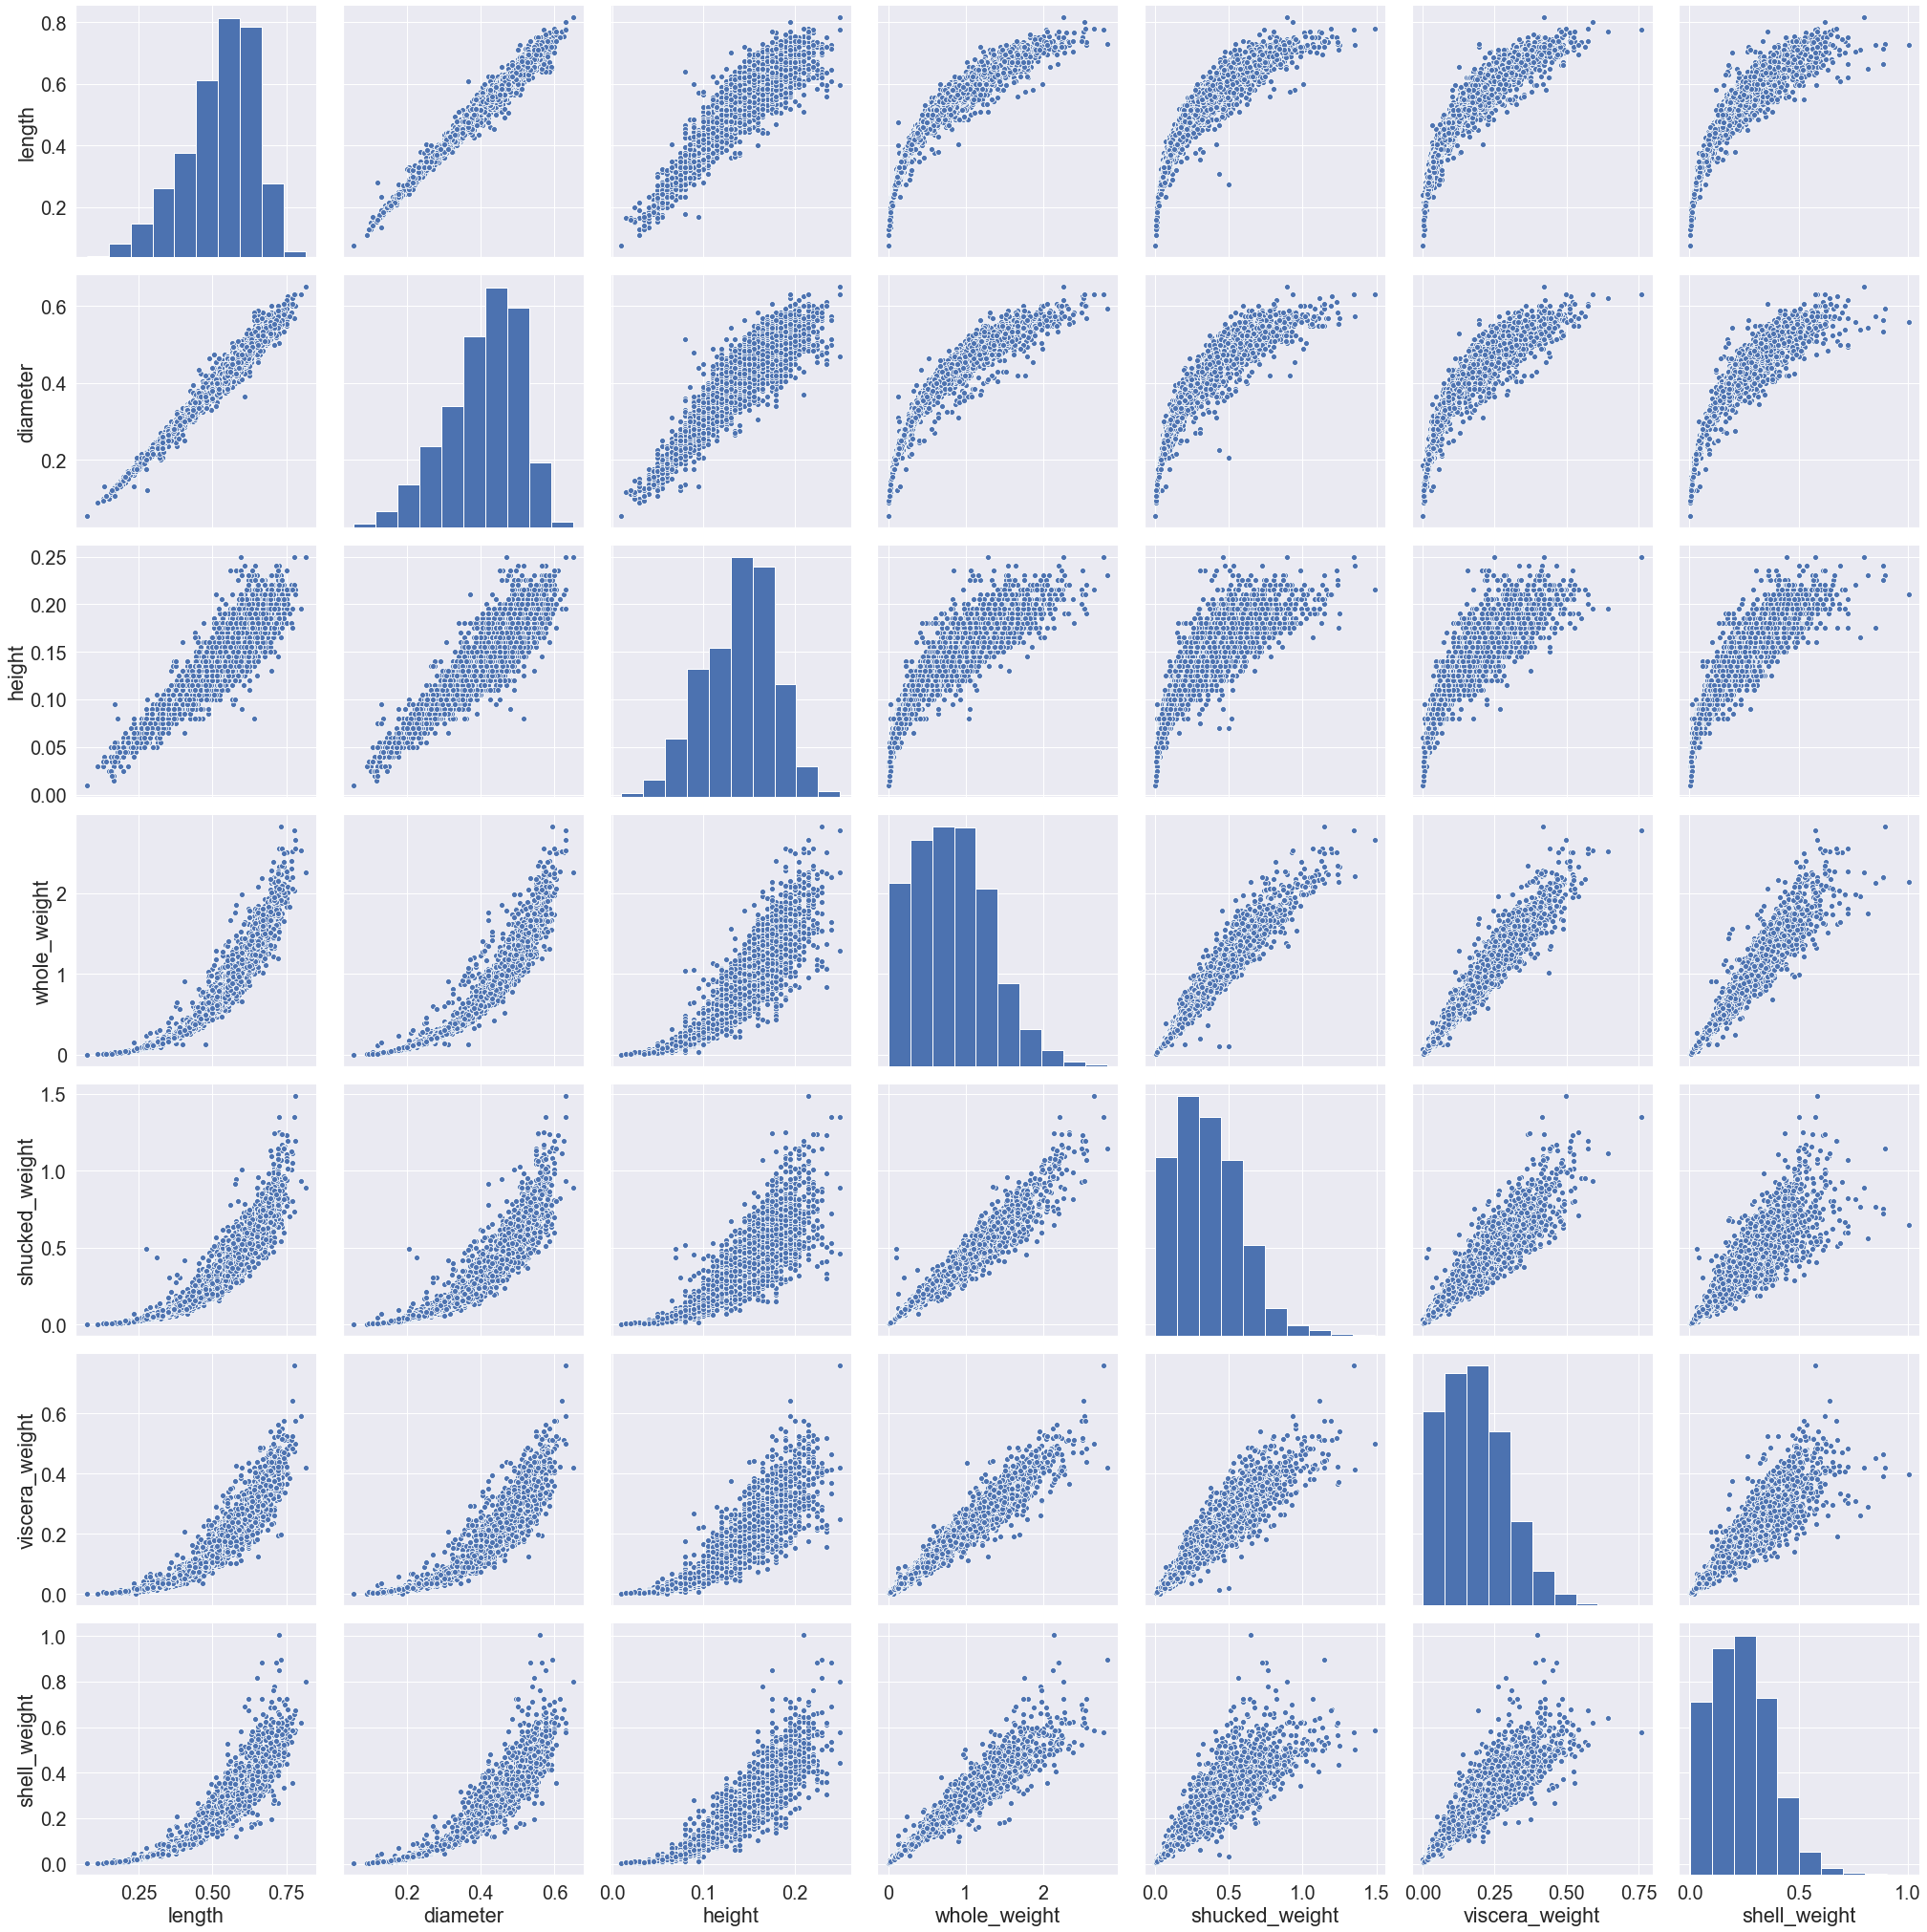

In [308]:
sns.set(font_scale=1.8)
sns.pairplot(x_sns, size = 4)

In [293]:
x_sns_corr = x_sns.corr()
x_sns_corr

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
length,1.000000,0.986799,0.902874,0.925330,0.898104,0.903010,0.898831
diameter,0.986799,1.000000,0.909080,0.925450,0.893316,0.899680,0.906351
height,0.902874,0.909080,1.000000,0.890479,0.839269,0.868993,0.893227
whole_weight,0.925330,0.925450,0.890479,1.000000,0.969440,0.966421,0.956211
shucked_weight,0.898104,0.893316,0.839269,0.969440,1.000000,0.931892,0.883763
viscera_weight,0.903010,0.899680,0.868993,0.966421,0.931892,1.000000,0.908866
shell_weight,0.898831,0.906351,0.893227,0.956211,0.883763,0.908866,1.000000


In [329]:
from sklearn.model_selection import GridSearchCV
myparam = { 
'n_estimators':[31,51,101,151],
'min_samples_split':[2,4,6,8],
'max_depth':[3,5,7,9]}
gridCV = GridSearchCV(model, param_grid = myparam, cv = 5, n_jobs = 4)
gridCV.fit(xTrain,yTrain)
print(gridCV.best_params_)

{'max_depth': 9, 'min_samples_split': 4, 'n_estimators': 151}


In [148]:
# 특정 문자열을 매핑 규칙에 따른 변환 → dict.get()
# ex) Lee, lee, → lee   이건 np.char.lower 함수로도 가능해
# ex) Choi, choi, Cho, CHO,... → others    근데 이런 low 함수로는 안되잖아.
df = pd.DataFrame({'name':['Kim','KIM','kim','Lee','lee','LEE','cho','choi'],
             'value':[1,2,3,4,5,6,7,8],
             'value2':[100,200,300,100,200,100,300,500]})
df

,name,value,value2
0,Kim,1,100
1,KIM,2,200
2,kim,3,300
3,Lee,4,100
4,lee,5,200
5,LEE,6,100
6,cho,7,300
7,choi,8,500


In [149]:
# 매핑을 해놓으면 나중에 유지보수하기도 좋지요
nameMapping={
    'KIM' : 'kim',
    'Kim' : 'kim',
    'LEE' : 'lee',
    'Lee' : 'lee',
    'cho' :'others',
    'choi' : 'others',  
    'woo':'others'
}

In [150]:
np.char.lower('KIM')

array('kim', dtype='<U3')

In [151]:
# 매핑 규칙에 정의 되지 않은 키가 전달되면 None 리턴
func=lambda x: nameMapping.get(x)

In [152]:
df.name.map(func)

0       kim
1       kim
2      None
3       lee
4      None
5       lee
6    others
7    others
Name: name, dtype: object

In [153]:
# 매핑 규칙에 정의 되지 않은 키가 전달되면 그냥 그대로 출력
func=lambda x: nameMapping.get(x,x)
df.name.map(func)

0       kim
1       kim
2       kim
3       lee
4       lee
5       lee
6    others
7    others
Name: name, dtype: object

In [154]:
# 매핑 규칙에 정의 되지 않은 키가 전달되면 그냥 그대로 출력
func=lambda x: nameMapping.get(x,'etc') # 없으면 etc로 출력.
df.name.map(func)

0       kim
1       kim
2       etc
3       lee
4       etc
5       lee
6    others
7    others
Name: name, dtype: object

In [156]:
df['name2']=df.name.map(func)
df

,name,value,value2,name2
0,Kim,1,100,kim
1,KIM,2,200,kim
2,kim,3,300,etc
3,Lee,4,100,lee
4,lee,5,200,etc
5,LEE,6,100,lee
6,cho,7,300,others
7,choi,8,500,others


In [160]:
df.groupby(['name2','name']).sum()

value  value2
name2  name               
etc    kim       3     300
       lee       5     200
kim    KIM       2     200
       Kim       1     100
lee    LEE       6     100
       Lee       4     100
others cho       7     300
       choi      8     500

In [ ]:
df['id2'] = df.id